# Distribución t

La distribución t (de Student) es una distribución de probabilidad que surge del problema de estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es **pequeño**. 

Usamos la **distribucíon t** cuando desconocemos la variable $\sigma$ , lo que ocurre la mayoría de las veces.

### Diferencias entre la distribución t y la distribución normal

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importamos la biblioteca necesaria para enlazar con el archivo requerido
import sys
sys.path.insert(0, '../statistics')
                
# R functions
from R_Functions import *

In [2]:
# distribución t
x01 = stats.t.rvs(df=2, size=200, random_state=42)
y01 = stats.t.pdf(x=x01, df=2)

# distribución normal
x02 = stats.norm.rvs(size=200, random_state=42)
y02 = stats.norm.pdf(x=x02)

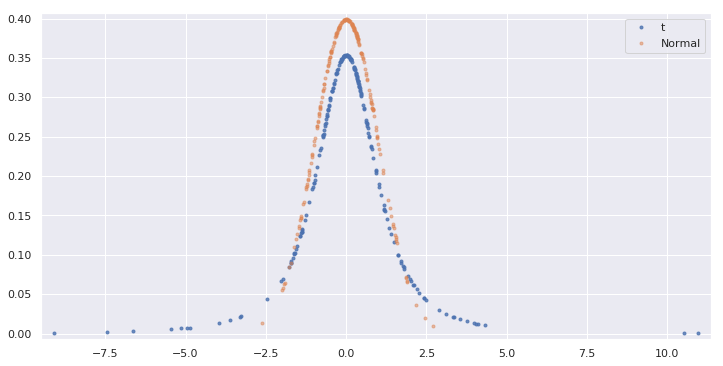

In [3]:
# draw
plt.figure(figsize=(12,6))
plt.plot(x01, y01, marker='.', linestyle='none', label ='t', alpha=0.8)
plt.plot(x02, y02, marker='.', linestyle='none', label ='Normal', alpha=0.5)
plt.margins(0.02)
plt.legend()
plt.show()

Podemos observar que las colas de la distribución t son más alargadas, lo cual indica que hay mayor probabilidad de obtener valores en los extremos de la distribución, concretamente a $2 \cdot \sigma$.

Esto implica que los **intervalos de confianza** construidos bajo una *distribución t* van a ser más amplios, o en otras palabras, más conservativos que los obtenidos bajo una distribución normal.

* La *distribución t* está siempre centrada en cero.
* Tiene un parámetro llamado **grados de libertad** que determina la anchura de las colas.

Conforme va incrementando los grados de libertad, la *distribución t* se aproxima a una *distribución normal*

We can use the `pt()` function to find probabilitues under the *t-distribution*. For a given cutoff value `q` and a given degrees of freedom `df`, `pt(q, df)` gives us the probability under the *t-distribution* with `df` degrees of freedom for values of `t` less than `q`. 

In other words, $P(t_{df} < T) = pt(q = T, df)$

In [4]:
#Calculate the cumulative of the t-distribution
stats.t.cdf(3, df=10), pt(3, 10)

(0.9933281724887152, 0.9933281724887152)

We can use the `qt()` function to find *cutoffs* under the *t-distribution*. For a given probability `p` and a given degrees of freedom `df`. `qt(p, df)` gives us the cutoff value for the *t-distribution* with `df` degrees of freedom for which probability under the curve is `p`.

In other words, $P(t_{df} < T) = p$ then $T = qt(p, df)$. For example, if $T$ corresponds to the 95th percentile of a distribution, $P = 0.95$. The middle 95% means from $p = 0.025$ to $p = 0.975$

In [5]:
# Calculate the quantile function of the t-distribution
stats.t.ppf(0.95, df = 10), qt(0.95, df = 10)

(1.8124611228107335, 1.8124611228107335)

# Estimando usando la distribución t

Vamos a aprender a obtener los intervalos de confianza para la media de una muestra usando la *distribucion t*

Supongamos que tenemos una muestra de 100 personas, de las cuales, 13 son zurdas. Si tu seleccionas otra muestra aleatoria de 100 personas, ¿te sorprenderías si solo 12 personas son zurdas? ¿Y si hubieran 15 personas? ¿o 30? ¿y 1 o 90 personas?

Mientras que haya 12 o 15 personas zurdas en las siguientes muestras es algo probable, el hecho que haya 1 o 90 personas es improbable. Pero no sabríamos contestar en el caso de 30 personas, por ejemplo.

Por tanto necesitamos cuantificar como de variable puede ser la muestra. Tenemos varias opciones:

* Bootstrapping
* Aproximar con el teorema central del límite

Ahora nos centraremos en este último método. Para ello la variable debe de cumplir unas ciertas condiciones:

* Las observaciones tienen que ser independientes
   * random sampling / assignament
   * if sampling without replacement, n < 10% of population
* Tamaño de la muestra / sesgo. 

In [6]:
df = pd.read_csv('data/michelson_speed_of_light.csv', index_col=0)
df_speed = df['velocity of light in air (km/s)'].values

In [7]:
df_speed[0:5], np.std(df_speed)

(array([299850, 299740, 299900, 300070, 299930]), 78.61450247886836)

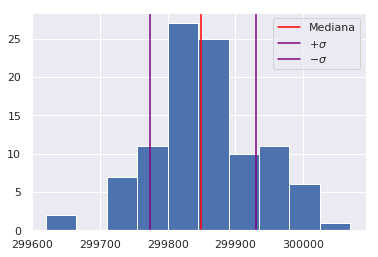

In [8]:
plt.hist(df_speed, bins=int(np.sqrt(len(df_speed))))
plt.axvline(np.median(df_speed), color='red', label='Mediana')
# Desviación estándar
plt.axvline(np.mean(df_speed) + np.std(df_speed),
            color='purple', label='$+\sigma$')
plt.axvline(np.mean(df_speed) - np.std(df_speed),
            color='purple', label='$-\sigma$')
plt.legend()
plt.show()

In [9]:
# Intervalos de confianza usando la distribución t
import statsmodels.stats.api as sms

# using statsmodels
conf1, conf2 = sms.DescrStatsW(df_speed).tconfint_mean(alpha=0.05)

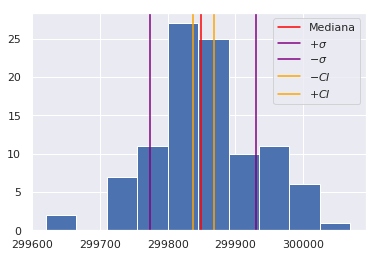

In [10]:
plt.hist(df_speed, bins=int(np.sqrt(len(df_speed))))
plt.axvline(np.median(df_speed), color='red', label='Mediana')
# Desviación estándar
plt.axvline(np.mean(df_speed) + np.std(df_speed),
            color='purple', label='$+\sigma$')
plt.axvline(np.mean(df_speed) - np.std(df_speed),
            color='purple', label='$-\sigma$')
# Intervalos de confianza calculados con t-test
plt.axvline(conf1, color='orange', label='$-CI$')
plt.axvline(conf2, color='orange', label='$+CI$')
plt.legend()
plt.show()

## Prueba-t para dos muestras emparejadas

Podemos usar el t-test, para probar si dos variables están o no emparejadas.

Vamos a continuar nuestra exploración de los precios de los libros de la UCLA y Amazon. La variable `diff` es la diferencia entre los precios de cada plataforma.

In [12]:
textbooks = pd.read_csv('../Datasets/textbooks/textbooks.txt',
                        sep='\t')
textbooks.head()

,deptAbbr,course,ibsn,uclaNew,amazNew,more,diff
0,Am Ind,C170,978-0803272620,27.67,27.95,Y,-0.28
1,Anthro,9,978-0030119194,40.59,31.14,Y,9.45
2,Anthro,135T,978-0300080643,31.68,32.00,Y,-0.32
3,Anthro,191HB,978-0226206813,16.00,11.52,Y,4.48
4,Art His,M102K,978-0892365999,18.95,14.21,Y,4.74


Intervalo de confianza del 90% para la media de precios.

In [13]:
stats.ttest_ind(textbooks.uclaNew, textbooks.amazNew)

Ttest_indResult(statistic=1.412384769202216, pvalue=0.15999421588073556)

In [28]:
sms.DescrStatsW(textbooks['diff'].values).tconfint_mean()

(9.435636081165885, 16.08765159006699)